In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import io
import requests
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [129]:
def deleteUselessData(df):
    del df["race"]  
    del df["name"]
    del df["address"]
    del df["education"] 
    del df["relationship"]
    del df["personal_info"]
    
def unifyPreg(df):
    df['pregnant'] = df['pregnant'].map({'f': 0, 'F': 0, 'FALSE': 0, 't': 1, 'T': 1, 'TRUE': 1})
    df['pregnant'] = df['pregnant'].fillna(0.0).astype(int)
    
def unifyIncome(df):
    df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})
    df['income'] = df['income'].fillna(0.0).astype(int)
    
def correctPersonalInd(df):
    df["personal_info"] = df["personal_info"].str.replace('\r\r\n', '|')
    new = df["personal_info"].str.split("|", expand = True)
    df["job"] = new[0]
    df["country"] = new[1]
    df["relation"] = new[2]
    df["race"] = new[3]

def unifyRelations(df):
    maxid = df['relationship'].value_counts().idxmax()
    df["relationship"].fillna("nan",inplace=True)
    df.loc[df['relationship'] == 'nan','relationship'] = maxid
    
    relations = df["relationship"].unique()
    for a in relations:
        df[a] = df['relationship'] == a
        df[a] = df[a].map({False: 0, True: 1})   

def fillMissingCountry(df):
    df["country"].fillna('?', inplace = True) 
    df.loc[df['country'] == '?'] = "nan"
    
    imp = SimpleImputer(missing_values = "nan", strategy='most_frequent')
    imp.fit(train_1.loc[:,['country', 'race']])
    
    df.loc[:,['country', 'race']] = imp.transform(df.loc[:,['country', 'race']])
    
def unifyRace(df):
    race = df["race"].unique()
    for a in race:
        df[a] = df["race"] == a
        df[a] = df[a].map({False: 0, True: 1})  
    
def unifyEduc(df):
    df["education"] = df["education"].replace(to_replace = [' 12th', ' HS-grad', ' 10th', ' 5th-6th', ' 7th-8th', ' 9th', ' 11th', ' 1st-4th', ' Preschool'], value = 'pre-collage')
    df["education"] = df["education"].replace(to_replace = [' Some-college', ' Assoc-acdm', ' Assoc-voc', ' Prof-school'], value = 'collage')
    df["education"] = df["education"].replace(to_replace = [' Bachelors', ' Masters', ' Doctorate'], value = 'post-collage')
    
    df["education-num"].fillna('nan', inplace = True)
    df["education"].fillna('nan', inplace = True) 

    imp = SimpleImputer(missing_values = "nan", strategy='most_frequent')
    imp.fit(df.loc[:,['education-num', 'education']])
    
    df.loc[:,['education-num', 'education']] = imp.transform(df.loc[:,['education-num', 'education']])
    
    race = df["education"].unique()
    
    for a in race:
        df[a] = df["education"] == a
        df[a] = df[a].map({False: 0, True: 1})
        
def correctExtremes(df, col):
    df[col] = pd.to_numeric(df[col],errors='coerce')
    #train_1[col] = pd.to_numeric(train_1[col],errors='coerce')
    mean = train_1[col].mean()
    df[col].fillna(mean, inplace = True) 

    botQ = train_1[col].quantile(0.25) - 1.5 * sc.iqr(train_1[col])
    topQ = train_1[col].quantile(0.25) + 1.5 * sc.iqr(train_1[col])

    Q5 = train_1[col].quantile(0.20)
    Q95 = train_1[col].quantile(0.80)

    for a in df[col]:
        if a < botQ:
            a = Q5
        elif a > topQ:
            a = Q95
    
def fillJob(df):
    maxid = df['job'].value_counts().idxmax()
    df["job"].fillna("?",inplace=True)
    df.loc[df['job'] == '?','job'] = maxid
    
def fillClass(df):
    maxid = train_1["class"].value_counts().idxmax()
    df["class"].fillna("nan",inplace=True)
    df.loc[df["class"] == 'nan',"class"] = maxid
    df["class"] = pd.to_numeric(df['class']) 
    

In [130]:
url1 = "https://raw.githubusercontent.com/LBukai/IAU_project/master/other_train.csv"
url2 = "https://raw.githubusercontent.com/LBukai/IAU_project/master/personal_train.csv"

url3 = "https://raw.githubusercontent.com/LBukai/IAU_project/master/other_valid.csv"
url4 = "https://raw.githubusercontent.com/LBukai/IAU_project/master/personal_valid.csv"

db1 = requests.get(url1).content
db2 = requests.get(url2).content

db3 = requests.get(url3).content
db4 = requests.get(url4).content

train_1 = pd.read_csv(io.StringIO(db1.decode('utf-8')))
train_2 = pd.read_csv(io.StringIO(db2.decode('utf-8')))

valid_1 = pd.read_csv(io.StringIO(db3.decode('utf-8')))
valid_2 = pd.read_csv(io.StringIO(db4.decode('utf-8')))

In [131]:
# modifu train
unifyPreg(train_1)
unifyIncome(train_1)
correctPersonalInd(train_1)
fillMissingCountry(train_1)
fillJob(train_1)
fillClass(train_1)

In [132]:
correctExtremes(train_1, 'skewness_glucose')
correctExtremes(train_1, 'mean_glucose')
correctExtremes(train_1, 'std_oxygen')
correctExtremes(train_1, 'kurtosis_glucose')
correctExtremes(train_1, 'fnlwgt')
correctExtremes(train_1, 'std_glucose')
correctExtremes(train_1, 'mean_oxygen')


In [133]:
unifyIncome(valid_1)
correctPersonalInd(valid_1)
unifyRelations(valid_1)
unifyPreg(valid_1)
fillMissingCountry(valid_1)
unifyRace(valid_1)
unifyEduc(valid_1)
fillJob(valid_1)
fillClass(valid_1)

valid_1.head()

,Unnamed: 0,name,address,kurtosis_oxygen,pregnant,education-num,relationship,skewness_glucose,mean_glucose,std_oxygen,...,Wife,Other-relative,Black,White,Asian-Pac-Islander,Amer-Indian-Eskimo,Other,collage,post-collage,pre-collage
0,0,Mauricio Thornbury,"81911 Walker Mall Apt. 577\r\nPort Tara, SD 05299",10.0161,0,10.0,Unmarried,-0.209469,130.07,13.1701,...,0,0,1,0,0,0,0,1,0,0
1,1,Samuel Schneider,Unit 6750 Box 0176\r\nDPO AE 17702,-0.641248,0,10.0,Unmarried,-0.0636653,123.805,72.7327,...,0,0,0,1,0,0,0,1,0,0
2,2,Ramon Butcher,"4132 Garcia Lake\r\nNorth Nancyside, MS 87804",8.33364,0,13.0,Husband,0.077016,125.344,16.2017,...,0,0,1,0,0,0,0,0,1,0
3,3,John Rodriguez,"63055 Marilyn Park\r\nCrystalburgh, SD 97193",10.5986,0,9.0,Own-child,1.62017,98.4688,15.3349,...,0,0,0,1,0,0,0,0,0,1
4,4,Alan Jackson,USNS Myers\r\nFPO AA 34795,7.76492,0,16.0,Husband,0.0120765,124.867,22.601,...,0,0,0,1,0,0,0,0,1,0


In [134]:
correctExtremes(valid_1, 'skewness_glucose')
correctExtremes(valid_1, 'mean_glucose')
correctExtremes(valid_1, 'std_oxygen')
correctExtremes(valid_1, 'kurtosis_glucose')
correctExtremes(valid_1, 'fnlwgt')
correctExtremes(valid_1, 'std_glucose')
correctExtremes(valid_1, 'mean_oxygen')

deleteUselessData(valid_1)

In [135]:
unifyRelations(train_1)
unifyRace(train_1)
unifyEduc(train_1)

#deleteUselessData(train_1)

In [136]:
corr = train_1.corr()
corr.style.background_gradient(cmap='coolwarm')

,education-num,skewness_glucose,mean_glucose,std_oxygen,kurtosis_glucose,fnlwgt,class,std_glucose,mean_oxygen,Unmarried,Husband,Not-in-family,Own-child,Wife,Other-relative,Black,White,Amer-Indian-Eskimo,Asian-Pac-Islander,Other,collage,post-collage,pre-collage
education-num,1,0.021398,-0.0190307,0.0260232,0.0214419,-0.0398826,0.030019,0.013749,0.0184783,-0.0372824,0.068277,0.051426,-0.111898,0.0480929,-0.0865621,-0.072188,0.0648842,-0.0397304,0.0587149,-0.084841,0.147679,0.705565,-0.728986
skewness_glucose,0.021398,1,-0.823995,0.55698,0.960041,-0.0192587,0.672197,-0.0156401,0.545401,-0.0152859,0.0277095,0.00321725,-0.0184774,-0.0166229,-0.001479,-0.00496474,0.00718121,-0.00476083,-0.0152168,0.0208415,0.022059,0.00638386,-0.0257334
mean_glucose,-0.0190307,-0.823995,1,-0.559182,-0.921789,0.0147402,-0.769331,0.0101749,-0.541364,0.000725636,-0.016501,-0.010426,0.0258736,0.0184509,-0.00503545,-0.00248188,-0.00894758,-0.000827818,0.0249606,-0.00267403,-0.0104674,-0.00323523,0.012384
std_oxygen,0.0260232,0.55698,-0.559182,1,0.618886,-0.01767,0.643327,0.0105879,0.799942,-0.022915,0.011473,0.0343987,-0.0345958,0.00163573,-0.00902459,-0.00533353,0.00966039,0.00859026,-0.028288,0.0241891,0.0236205,0.00707739,-0.027758
kurtosis_glucose,0.0214419,0.960041,-0.921789,0.618886,1,-0.0219472,0.780312,-0.0120911,0.591053,-0.0146215,0.025919,0.0103174,-0.0221866,-0.0216894,-0.00128261,-0.0085927,0.015858,-0.00336541,-0.0252078,0.0164404,0.020867,0.00640412,-0.0246497
fnlwgt,-0.0398826,-0.0192587,0.0147402,-0.01767,-0.0219472,1,-0.0181604,-0.012172,-0.0221482,0.0168802,-0.0254716,0.0082241,0.00527173,-0.0419349,0.0651218,0.116599,-0.0775578,-0.076428,-0.0216108,0.0284629,-0.0319818,-0.0176331,0.0443454
class,0.030019,0.672197,-0.769331,0.643327,0.780312,-0.0181604,1,-0.00881443,0.512426,-0.0109291,-0.0057102,0.0429983,-0.0302962,-0.00863955,0.00163729,0.00130068,0.00804154,0.00131942,-0.0194977,-0.000481191,0.00460596,0.0243449,-0.0247009
std_glucose,0.013749,-0.0156401,0.0101749,0.0105879,-0.0120911,-0.012172,-0.00881443,1,0.010907,0.0210648,-0.0120681,0.0166986,-0.0196516,0.0123763,-0.0186266,-0.00462346,0.0119093,-0.00751898,-0.00716158,-0.0104944,-0.01197,0.00819487,0.00417151
mean_oxygen,0.0184783,0.545401,-0.541364,0.799942,0.591053,-0.0221482,0.512426,0.010907,1,-0.0114938,0.0171482,0.01692,-0.0377029,0.00755592,-0.00196432,0.0115797,-0.00619971,0.00285381,-0.0175413,0.0156266,0.0115951,-3.35543e-05,-0.01068
Unmarried,-0.0372824,-0.0152859,0.000725636,-0.022915,-0.0146215,0.0168802,-0.0109291,0.0210648,-0.0114938,1,-0.283221,-0.192412,-0.142441,-0.0748833,-0.058045,0.142819,-0.121502,-0.0173736,0.0106656,-0.00192613,0.025384,-0.0631799,0.0296225


In [137]:
train_1[train_1['class'] == 1]

,Unnamed: 0,name,address,kurtosis_oxygen,pregnant,education-num,relationship,skewness_glucose,mean_glucose,std_oxygen,...,Wife,Other-relative,Black,White,Amer-Indian-Eskimo,Asian-Pac-Islander,Other,collage,post-collage,pre-collage
4,4,John Fontaine,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",0.303268,0,13.0,Own-child,16.967138,37.226562,45.169221,...,0,0,1,0,0,0,0,0,1,0
14,14,Edward Mclaughlin,"866 Ashley Port Suite 477\r\nCohentown, GA 90696",0.546762,0,10.0,Not-in-family,3.699362,80.625000,80.414901,...,0,0,0,1,0,0,0,1,0,0
17,17,Martin Jenkins,USCGC Bailey\r\nFPO AE 53556,3.67107,1,14.0,Not-in-family,2.230771,78.187500,45.978668,...,0,0,0,1,0,0,0,0,1,0
21,21,Roger Navarro,"94941 Hill Dam Suite 110\r\nWest Madison, LA 0...",4.08432,0,9.0,Husband,5.062537,84.007812,40.570207,...,0,0,0,1,0,0,0,0,0,1
27,27,Jose Watts,"87859 Nancy Fork Suite 963\r\nYoungton, DC 53962",0.805389,0,10.0,Husband,12.983919,35.640625,71.432434,...,0,0,0,1,0,0,0,1,0,0
33,33,Christopher Fales,6683 Snyder Prairie Suite 635\r\nLake Nicholas...,0.303898,0,11.0,Own-child,35.985806,36.062500,81.116990,...,0,0,0,1,0,0,0,1,0,0
34,34,Michael Everett,"60240 Robinson Oval\r\nNew Michael, WV 42805",0.759664,0,9.0,Not-in-family,15.420309,23.804688,53.155749,...,0,0,0,1,0,0,0,0,0,1
38,38,John Merkle,"7116 Cunningham View Suite 519\r\nNew David, U...",0.0940112,0,11.0,Not-in-family,28.675575,27.367188,76.742368,...,0,0,0,1,0,0,0,1,0,0
41,41,Sean Hille,"67047 Blake Mountains\r\nDownsstad, RI 08722",2.63871,0,10.0,Not-in-family,36.656099,19.359375,47.539914,...,0,0,0,1,0,0,0,1,0,0
43,43,Anthony Foster,"927 Mitchell Via\r\nPort Anthonyhaven, VT 21694",3.86947,0,10.0,Not-in-family,17.860164,54.007812,39.491339,...,0,0,0,1,0,0,0,1,0,0


C:\Users\HomeOne\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


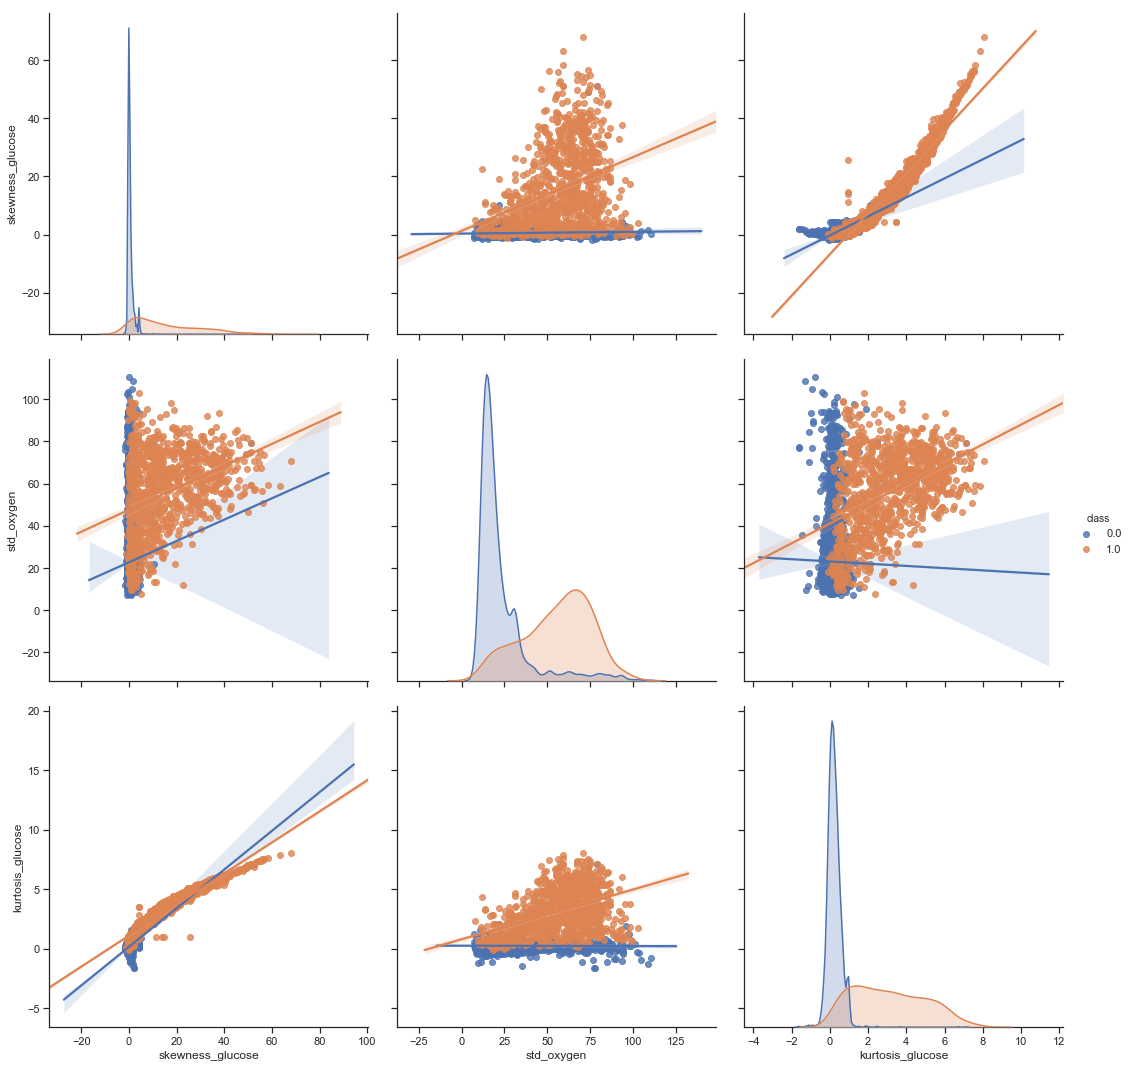

In [138]:
sns.set(style="ticks", color_codes=True)

df = train_1[['skewness_glucose', 'std_oxygen', 'kurtosis_glucose', 'class']]
sns.pairplot(df, height= 5, hue= 'class', vars=['skewness_glucose', 'std_oxygen', 'kurtosis_glucose'], kind="reg")

In [139]:
def testPrint(row):
    print(row)

def manualDecisionTree(std_oxygen, skewness_glucose, kurtosis_glucose):
    lim_stf_O = 30
    lim_skew_gluc = 7
    lim_kurt_gluc = 1.2
    temp = 0
    
    if kurtosis_glucose > 1.1:
        return 1
    else:
        if skewness_glucose > 6:
            return 1
        else:
            if std_oxygen > 37:
                return 1
            else:
                return 0
  

In [140]:
train_1['pred_class'] = train_1.apply(lambda row : manualDecisionTree(row['std_oxygen'], row['skewness_glucose'], row['kurtosis_glucose']), axis = 1) 

#train_1[train_1['pred_class'] == 0]
#train_1[train_1['class'] != train_1['pred_class']][['class', 'pred_class']]

print(confusion_matrix(train_1['class'], train_1['pred_class']))
print(classification_report(train_1['class'], train_1['pred_class']))

[[2666  312]
 [ 105  900]]
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      2978
         1.0       0.74      0.90      0.81      1005

   micro avg       0.90      0.90      0.90      3983
   macro avg       0.85      0.90      0.87      3983
weighted avg       0.91      0.90      0.90      3983



In [141]:
valid_1['pred_class'] = valid_1.apply(lambda row : manualDecisionTree(row['std_oxygen'], row['skewness_glucose'], row['kurtosis_glucose']), axis = 1) 

print(confusion_matrix(valid_1['class'], valid_1['pred_class']))
print(classification_report(valid_1['class'], valid_1['pred_class']))

[[890 129]
 [ 21 321]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1019
           1       0.71      0.94      0.81       342

   micro avg       0.89      0.89      0.89      1361
   macro avg       0.85      0.91      0.87      1361
weighted avg       0.91      0.89      0.89      1361



,Unnamed: 0,name,address,kurtosis_oxygen,pregnant,education-num,relationship,skewness_glucose,mean_glucose,std_oxygen,...,Other-relative,Black,White,Amer-Indian-Eskimo,Asian-Pac-Islander,Other,collage,post-collage,pre-collage,pred_class
0,0,Milton Stamper,"145 Autumn Manor\r\nNew Michael, NE 83039",10.177,0,10.0,Unmarried,2.445834,87.835938,16.616788,...,0,1,0,0,0,0,1,0,0,0
1,1,Michael Pope,"41479 Kelly Locks Apt. 061\r\nSuarezmouth, AK ...",19.6747,0,13.0,Husband,0.763944,140.343750,9.774889,...,0,1,0,0,0,0,0,1,0,0
2,2,Leonard Buckley,"0646 Adam Grove\r\nNew Jennifershire, NH 95027",9.00935,0,8.0,Not-in-family,0.023184,112.632812,13.678551,...,0,0,1,0,0,0,0,0,1,0
3,3,Ricky Paterson,430 Joseph Stravenue Suite 773\r\nSouth Jaclyn...,9.11908,0,10.0,Not-in-family,-0.566705,128.390625,16.570603,...,0,1,0,0,0,0,1,0,0,0
4,4,John Fontaine,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",0.303268,0,13.0,Own-child,16.967138,37.226562,45.169221,...,0,1,0,0,0,0,0,1,0,1
5,5,Julio Warner,"471 Robert Mill\r\nLake Sarahshire, SD 27092",7.1463,0,10.0,Husband,-0.036529,134.515625,25.228435,...,0,0,1,0,0,0,1,0,0,0
6,6,John Tice,"8542 Daniel Harbor\r\nDavidside, LA 70371",12.7628,0,13.0,Husband,2.519991,89.570312,15.041549,...,0,0,1,0,0,0,0,1,0,0
7,7,Adam Chipman,"95602 Gordon Junctions\r\nNorth Meganbury, OR ...",7.95166,0,10.0,Own-child,0.406185,96.210938,21.541679,...,0,0,1,0,0,0,1,0,0,0
8,8,Jerome Thompson,"392 Koch Pine Suite 232\r\nMichaelmouth, TX 92072",4.9878,0,14.0,Husband,0.834374,128.343750,32.265718,...,0,0,1,0,0,0,0,1,0,0
9,9,Brad Ortiz,"94782 Ortega Summit\r\nNew Andrewmouth, MN 99751",28.2972,0,13.0,Husband,0.234452,102.679688,8.130882,...,0,0,1,0,0,0,0,1,0,0


In [123]:
train_1[train_1['class'] != train_1['pred_class']][['class', 'pred_class']]

,class,pred_class
25,0.0,1
36,0.0,1
67,0.0,1
70,1.0,0
89,1.0,0
94,0.0,1
95,1.0,0
109,0.0,1
117,0.0,1
124,0.0,1


In [124]:
valid_1[valid_1['class'] != valid_1['pred_class']][['class', 'pred_class']]

,class,pred_class
25,0,1
36,0,1
67,0,1
70,1,0
89,1,0
94,0,1
95,1,0
109,0,1
117,0,1
124,0,1


In [126]:
valid_1

,Unnamed: 0,kurtosis_oxygen,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,...,Other-relative,Black,White,Amer-Indian-Eskimo,Asian-Pac-Islander,Other,collage,post-collage,pre-collage,pred_class
0,0,10.177,0,10.0,2.445834,87.835938,16.616788,0,114.8,0.563505,...,0,1,0,0,0,0,1,0,0,0
1,1,19.6747,0,13.0,0.763944,140.343750,9.774889,0,444.482,0.047948,...,0,1,0,0,0,0,0,1,0,0
2,2,9.00935,0,8.0,0.023184,112.632812,13.678551,0,117.518,0.403222,...,0,0,1,0,0,0,0,0,1,0
3,3,9.11908,0,10.0,-0.566705,128.390625,16.570603,0,102.301,0.003284,...,0,1,0,0,0,0,1,0,0,0
4,4,0.303268,0,13.0,16.967138,37.226562,45.169221,0,0.67577,3.643543,...,0,1,0,0,0,0,0,1,0,1
5,5,7.1463,0,10.0,-0.036529,134.515625,25.228435,2407,52.2429,-0.177843,...,0,0,1,0,0,0,1,0,0,0
6,6,12.7628,0,13.0,2.519991,89.570312,15.041549,7688,182.834,0.572433,...,0,0,1,0,0,0,0,1,0,0
7,7,7.95166,0,10.0,0.406185,96.210938,21.541679,0,69.1482,0.375572,...,0,0,1,0,0,0,1,0,0,0
8,8,4.9878,0,14.0,0.834374,128.343750,32.265718,0,24.9488,0.097544,...,0,0,1,0,0,0,0,1,0,0
9,9,28.2972,0,13.0,0.234452,102.679688,8.130882,0,839.871,0.386944,...,0,0,1,0,0,0,0,1,0,0


In [127]:
train_1

,Unnamed: 0,name,address,kurtosis_oxygen,pregnant,education-num,relationship,skewness_glucose,mean_glucose,std_oxygen,...,Other-relative,Black,White,Amer-Indian-Eskimo,Asian-Pac-Islander,Other,collage,post-collage,pre-collage,pred_class
0,0,Milton Stamper,"145 Autumn Manor\r\nNew Michael, NE 83039",10.177,0,10.0,Unmarried,2.445834,87.835938,16.616788,...,0,1,0,0,0,0,1,0,0,0
1,1,Michael Pope,"41479 Kelly Locks Apt. 061\r\nSuarezmouth, AK ...",19.6747,0,13.0,Husband,0.763944,140.343750,9.774889,...,0,1,0,0,0,0,0,1,0,0
2,2,Leonard Buckley,"0646 Adam Grove\r\nNew Jennifershire, NH 95027",9.00935,0,8.0,Not-in-family,0.023184,112.632812,13.678551,...,0,0,1,0,0,0,0,0,1,0
3,3,Ricky Paterson,430 Joseph Stravenue Suite 773\r\nSouth Jaclyn...,9.11908,0,10.0,Not-in-family,-0.566705,128.390625,16.570603,...,0,1,0,0,0,0,1,0,0,0
4,4,John Fontaine,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",0.303268,0,13.0,Own-child,16.967138,37.226562,45.169221,...,0,1,0,0,0,0,0,1,0,1
5,5,Julio Warner,"471 Robert Mill\r\nLake Sarahshire, SD 27092",7.1463,0,10.0,Husband,-0.036529,134.515625,25.228435,...,0,0,1,0,0,0,1,0,0,0
6,6,John Tice,"8542 Daniel Harbor\r\nDavidside, LA 70371",12.7628,0,13.0,Husband,2.519991,89.570312,15.041549,...,0,0,1,0,0,0,0,1,0,0
7,7,Adam Chipman,"95602 Gordon Junctions\r\nNorth Meganbury, OR ...",7.95166,0,10.0,Own-child,0.406185,96.210938,21.541679,...,0,0,1,0,0,0,1,0,0,0
8,8,Jerome Thompson,"392 Koch Pine Suite 232\r\nMichaelmouth, TX 92072",4.9878,0,14.0,Husband,0.834374,128.343750,32.265718,...,0,0,1,0,0,0,0,1,0,0
9,9,Brad Ortiz,"94782 Ortega Summit\r\nNew Andrewmouth, MN 99751",28.2972,0,13.0,Husband,0.234452,102.679688,8.130882,...,0,0,1,0,0,0,0,1,0,0
